'''
v1: Scienceon, DBPIA, NTIS AuthorPapers 접근하여 Rawdata에서 필터링된 papers를 추가
v2: Answer 변경 및 f_id 수정 중
v3: time, tqdm 추가하여 속도 확인
v4: Scienceon, DBPIA에 mng로 검색 추가
v5: DBPIA 삭제하고 KCI 추가 & Rawdata 먼저 접급으로 변경, answer check 추가
'''

In [37]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import sklearn.preprocessing

In [38]:
xlsData = pd.read_excel("C:/workSpace(expert)/PM10.xlsx")

In [39]:
samples = xlsData[['Temp', 'Wind Speed','Humidity', 'PM10']]
print(samples)

       Temp  Wind Speed  Humidity  PM10
0      -0.8         0.7      78.0   104
1      -1.8         0.3      85.0   102
2      -2.0         0.1      88.0    92
3      -2.6         0.6      90.0   102
4      -3.0         0.3      92.0    94
...     ...         ...       ...   ...
16155   1.0         1.0      39.0    24
16156   0.5         1.2      45.0    40
16157   0.1         0.5      51.0    46
16158   0.1         0.8      53.0    54
16159  -0.3         0.6      54.0    62

[16160 rows x 4 columns]


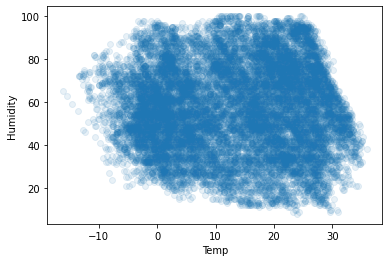

In [40]:
from matplotlib import pyplot as plt

x = samples['Temp']
y = samples['Humidity']

plt.scatter(x, y, alpha=0.1)
plt.xlabel('Temp')
plt.ylabel('Humidity')
plt.show()

In [63]:
k = 4
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = list(zip(centroids_x, centroids_y))

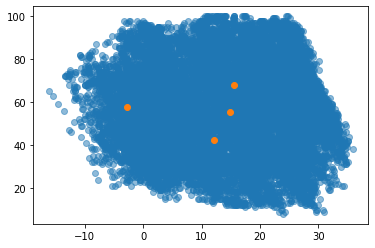

In [64]:
plt.scatter(x, y, alpha=0.5)
plt.scatter(centroids_x, centroids_y)
plt.show()

In [65]:
def distance(a, b):
    return sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a, b))]) ** 0.5

In [66]:
labels = np.zeros(len(samples))
sepal_length_width = np.array(list(zip(x, y)))
for i in range(len(samples)):
  distances = np.zeros(k)
  for j in range(k):
    distances[j] = distance(sepal_length_width[i], centroids[j])
  cluster = np.argmin(distances)
  labels[i] = cluster

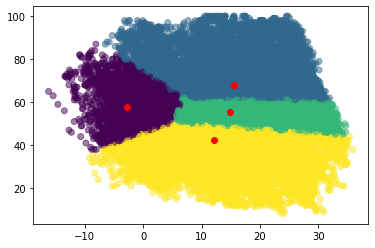

In [67]:
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, c='red')
plt.show()

In [35]:
from copy import deepcopy
centroids_old = deepcopy(centroids)
centroids_old

[(20.119432129213077, 73.95953838033587),
 (3.252201230540983, 42.11219757157996),
 (9.08314601181496, 46.41637379525563)]

In [36]:
for i in range(k):
  points = [ sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i ]
  centroids[i] = np.mean(points, axis=0)

TypeError: list indices must be integers or slices, not tuple

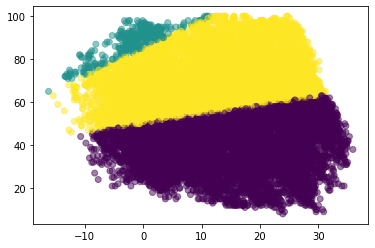

In [25]:
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_old[:, 0], centroids_old[:, 1], c='blue')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()